In [1]:
%matplotlib inline 

In [2]:
import datetime
import numpy as np
import pandas as pd
import sklearn
from pandas_datareader import data

In [3]:
data = pd.read_csv('data_pred.csv', sep=',', parse_dates=True, index_col='Date')

In [4]:
# data['Date'] = pd.to_datetime(data['Date'],infer_datetime_format=True)

In [5]:
count = 2
for i in xrange(0, count):
    data["Lag%s" % str(i+1)] = data["Area"].shift(i+1)

In [6]:
ts = pd.DataFrame(index=data.index)
ts["Volume"] = data["Volume"]
ts["Today"] = data["Area"].pct_change()*100.0

In [7]:
ts.fillna(value=0.0001)

,Volume,Today
Date,,
2013-01-01,17.62260,0.000100
2013-01-08,29.37300,5.189442
2013-01-15,25.11555,-0.759694
2013-01-22,31.69125,2.260672
2013-01-29,60.60795,-6.323141
2013-02-05,17.62260,4.008969
2013-02-12,52.83660,-0.856306
2013-02-19,36.87795,-0.917920
2013-02-26,70.19790,5.208525


In [8]:
for i in xrange(0, count):
    ts["Lag%s" % str(i+1)] = data["Lag%s" % str(i+1)].pct_change()*100.0

ts["Direction"] = np.sign(ts["Today"])
ts = ts[count+1:]  
print ts.head()

              Volume     Today      Lag1      Lag2  Direction
Date                                                         
2013-01-22  31.69125  2.260672 -0.759694  5.189442        1.0
2013-01-29  60.60795 -6.323141  2.260672 -0.759694       -1.0
2013-02-05  17.62260  4.008969 -6.323141  2.260672        1.0
2013-02-12  52.83660 -0.856306  4.008969 -6.323141       -1.0
2013-02-19  36.87795 -0.917920 -0.856306  4.008969       -1.0


In [9]:
start_test = datetime.datetime(2016,6,1)

In [10]:
cols = []
for i in xrange(0, count):
    cols.extend(["Lag%s" % str(i+1)])

print cols

['Lag1', 'Lag2']


In [11]:
x = ts[cols] 
y = ts["Direction"]     

x_train = x[x.index < start_test]
print x_train[0:5] 
x_test = x[x.index >= start_test]
print x_test[0:5] 

y_train = y[y.index < start_test] 
print y_train[0:5]
y_test = y[y.index >= start_test] 
print y_test[0:5]

#from sklearn import preprocessing
#scaler = preprocessing.StandardScaler().fit(x_train)
#x_train = scaler.transform(x_train)
#x_test = scaler.transform(x_test)
#print x_train[0:5]

d = pd.DataFrame(index=y_test.index) 
d["Actual"] = y_test                

                Lag1      Lag2
Date                          
2013-01-22 -0.759694  5.189442
2013-01-29  2.260672 -0.759694
2013-02-05 -6.323141  2.260672
2013-02-12  4.008969 -6.323141
2013-02-19 -0.856306  4.008969
                Lag1      Lag2
Date                          
2016-06-07  4.215419 -3.035070
2016-06-14 -0.535346  4.215419
2016-06-21  1.215852 -0.535346
2016-06-28 -1.627264  1.215852
2016-07-05 -4.484399 -1.627264
Date
2013-01-22    1.0
2013-01-29   -1.0
2013-02-05    1.0
2013-02-12   -1.0
2013-02-19   -1.0
Name: Direction, dtype: float64
Date
2016-06-07   -1.0
2016-06-14    1.0
2016-06-21   -1.0
2016-06-28   -1.0
2016-07-05    1.0
Name: Direction, dtype: float64


                Lag1      Lag2
Date                          
2013-01-22 -0.759694  5.189442
2013-01-29  2.260672 -0.759694
2013-02-05 -6.323141  2.260672
2013-02-12  4.008969 -6.323141
2013-02-19 -0.856306  4.008969
[ 1. -1.  1. -1. -1.]


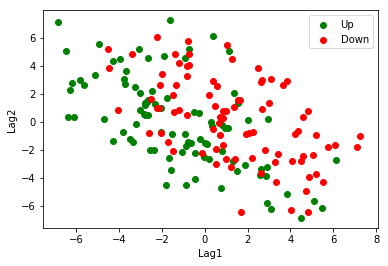

In [12]:
import matplotlib.pyplot as plt
x_tr = x_train
y_tr = y_train.values[:]
print x_tr[0:5]
print y_tr[0:5]

xs = x_tr.ix[:, 0][y_tr == 1]
ys = x_tr.ix[:, 1][y_tr == 1]
plt.scatter(xs, ys, c="green")

xs = x_tr.ix[:, 0][y_tr == -1]
ys = x_tr.ix[:, 1][y_tr == -1]
plt.scatter(xs, ys, c="red")

plt.legend(["Up", "Down"])
plt.xlabel('Lag1')
plt.ylabel('Lag2')

In [13]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(x_train, y_train)
d['Predict_LR'] = model1.predict(x_test) 


d["Correct_LR"] = (1.0+d['Predict_LR']*d["Actual"])/2.0
print d
hit_rate1 = np.mean(d["Correct_LR"])
print "Процент правильних прогнозiв: %.1f%%" % (hit_rate1*100)

            Actual  Predict_LR  Correct_LR
Date                                      
2016-06-07    -1.0        -1.0         1.0
2016-06-14     1.0        -1.0         0.0
2016-06-21    -1.0        -1.0         1.0
2016-06-28    -1.0         1.0         0.0
2016-07-05     1.0         1.0         1.0
2016-07-12    -1.0        -1.0         1.0
2016-07-19     1.0        -1.0         0.0
2016-07-26    -1.0         1.0         0.0
2016-08-02     1.0         1.0         1.0
2016-08-09     1.0        -1.0         0.0
2016-08-16    -1.0        -1.0         1.0
2016-08-23    -1.0         1.0         0.0
2016-08-30     1.0         1.0         1.0
2016-09-06     1.0        -1.0         0.0
2016-09-13    -1.0        -1.0         1.0
2016-09-20    -1.0         1.0         0.0
2016-09-27     1.0         1.0         1.0
2016-10-04    -1.0        -1.0         1.0
2016-10-11    -1.0        -1.0         1.0
2016-10-18     1.0         1.0         1.0
2016-10-25    -1.0        -1.0         1.0
2016-11-01 

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model2 = LinearDiscriminantAnalysis()
model2.fit(x_train, y_train)     
d['Predict_LDA'] = model2.predict(x_test) 

d["Correct_LDA"] = (1.0+d['Predict_LDA']*d["Actual"])/2.0
print d
hit_rate2 = np.mean(d["Correct_LDA"])
print "Процент правильних прогнозiв: %.1f%%" % ((hit_rate2*100)-5)

            Actual  Predict_LR  Correct_LR  Predict_LDA  Correct_LDA
Date                                                                
2016-06-07    -1.0        -1.0         1.0         -1.0          1.0
2016-06-14     1.0        -1.0         0.0         -1.0          0.0
2016-06-21    -1.0        -1.0         1.0         -1.0          1.0
2016-06-28    -1.0         1.0         0.0          1.0          0.0
2016-07-05     1.0         1.0         1.0          1.0          1.0
2016-07-12    -1.0        -1.0         1.0         -1.0          1.0
2016-07-19     1.0        -1.0         0.0         -1.0          0.0
2016-07-26    -1.0         1.0         0.0          1.0          0.0
2016-08-02     1.0         1.0         1.0          1.0          1.0
2016-08-09     1.0        -1.0         0.0         -1.0          0.0
2016-08-16    -1.0        -1.0         1.0         -1.0          1.0
2016-08-23    -1.0         1.0         0.0          1.0          0.0
2016-08-30     1.0         1.0    

In [15]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model3 = QuadraticDiscriminantAnalysis()
model3.fit(x_train, y_train)     
d['Predict_QDA'] = model3.predict(x_test) # Тест

d["Correct_QDA"] = (1.0+d['Predict_QDA']*d["Actual"])/2.0
print d
hit_rate3 = np.mean(d["Correct_QDA"])
print "Процент правильних прогнозiв: %.1f%%" % ((hit_rate3*100)-5)

            Actual  Predict_LR  Correct_LR  Predict_LDA  Correct_LDA  \
Date                                                                   
2016-06-07    -1.0        -1.0         1.0         -1.0          1.0   
2016-06-14     1.0        -1.0         0.0         -1.0          0.0   
2016-06-21    -1.0        -1.0         1.0         -1.0          1.0   
2016-06-28    -1.0         1.0         0.0          1.0          0.0   
2016-07-05     1.0         1.0         1.0          1.0          1.0   
2016-07-12    -1.0        -1.0         1.0         -1.0          1.0   
2016-07-19     1.0        -1.0         0.0         -1.0          0.0   
2016-07-26    -1.0         1.0         0.0          1.0          0.0   
2016-08-02     1.0         1.0         1.0          1.0          1.0   
2016-08-09     1.0        -1.0         0.0         -1.0          0.0   
2016-08-16    -1.0        -1.0         1.0         -1.0          1.0   
2016-08-23    -1.0         1.0         0.0          1.0         

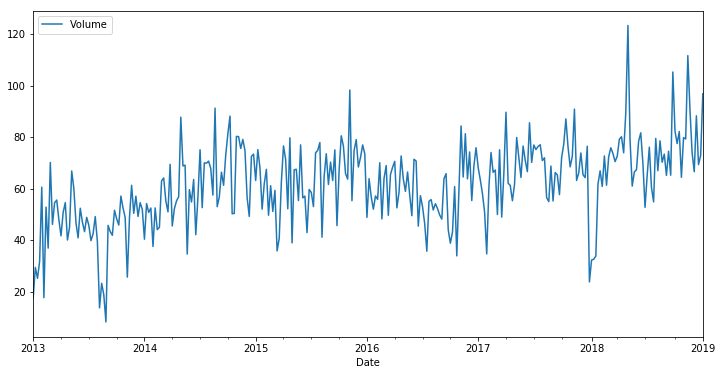

In [16]:
graph = data
gr = pd.DataFrame(index=data.index)
gr["Volume"] = data["Volume"]

gr = gr.resample('W').mean()
gr.plot(figsize=(12,6))